In [1]:
import numpy as np
from scipy.linalg import rq


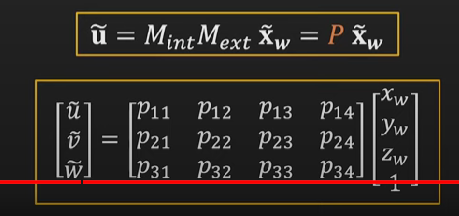

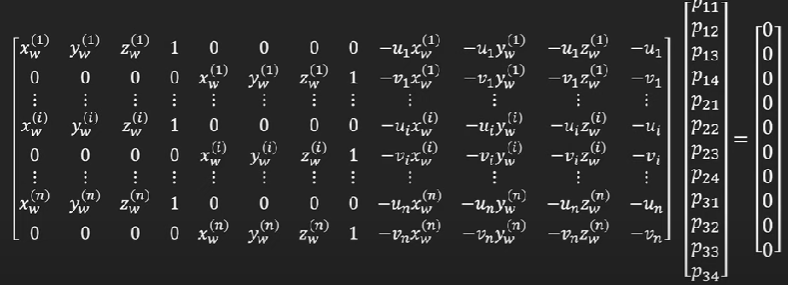

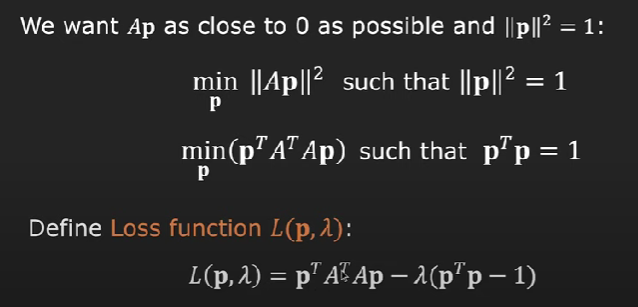

it's the eigen value problem; that is solution is the eigen vector of (A^T)A with least eigen value
and thus solution can be converted to SVD decomposition problem of A

In [2]:
def dlt_calibration(world_points, image_points):
    """
    Camera calibration using the Direct Linear Transform (DLT).
    
    Args:
    - world_points (list of tuples): List of (X, Y, Z) tuples
    - image_points (list of tuples): List of (u, v) tuples
    
    Returns:
    - K (numpy array): Intrinsic matrix
    - R (numpy array): Rotation matrix
    - T (numpy array): Translation vector
    """
    n = len(world_points)
    
    # Construct matrix A
    A = []
    for i in range(n):
        X, Y, Z = world_points[i]
        u, v = image_points[i]
        A.append([X, Y, Z, 1, 0, 0, 0, 0, -u*X, -u*Y, -u*Z, -u])
        A.append([0, 0, 0, 0, X, Y, Z, 1, -v*X, -v*Y, -v*Z, -v])
    A = np.asarray(A)
    
    # Solve for P using SVD
    _, _, V = np.linalg.svd(A)
    P = V[-1].reshape(3, 4)
    
    # Normalize P
    P /= P[-1, -1] ## As P and kP represents same camera for any non zero scalar k; so this normalisation hack will take care of this ambiguity
    
    # Decompose P into K, R, and T
    M = P[:, 0:3]
    
    K, R = rq(M)
    
    # Ensure diagonal of intrinsic matrix is positive
    for i in range(3):
        if K[i, i] < 0:
            K[:, i] = -K[:, i]
            R[i, :] = -R[i, :]
    
    T = np.linalg.inv(K).dot(P[:, 3])
    
    return K, R, T



In [3]:
world_points = [(0, 0, 0), (1, 0, 0), (0, 1, 0), (1, 1, 0)]
image_points = [(100, 200), (150, 200), (100, 250), (150, 250)]
K, R, T = dlt_calibration(world_points, image_points)
print("K:", K)
print("R:", R)
print("T:", T)


K: [[ 3.42591312e+01  2.73180359e+01  4.90050648e+01]
 [ 0.00000000e+00  7.89989826e+01  9.92489921e+00]
 [ 0.00000000e+00 -0.00000000e+00  2.13123053e-14]]
R: [[ 0.15569084 -0.76873723 -0.62032526]
 [-0.12313331  0.6079816  -0.78434467]
 [ 0.9801013   0.19849798 -0.        ]]
T: [-6.24167212e+13 -5.89486928e+12  4.69212499e+13]
